# COMP5331 Group 6 Project: Resilient k-Clustering

In [2]:
from os import mkdir
%load_ext autoreload
%autoreload 2

## Mount Drive

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/Colab Notebooks/Comp 5331/"
%ls

## Preprocess datasets

In [1]:
from src.preprocess.process_uber import process_uber
ds_path = "dataset/uber/uber-raw-data-jun14.csv"
save_path = "dataset/uber/"
process_uber(ds_path, save_path)

11/08/2024, 13:20:35: creating graph
11/08/2024, 13:20:49: matching
11/08/2024, 13:20:54: finish


In [2]:
from src.preprocess.process_geo import process_geo
ds_names = ["Brightkite", "Gowalla"]
for ds_name in ds_names:
    print(f"Processing {ds_name} dataset")
    ds_path = f"dataset/snap_standford/{ds_name}_totalCheckins.txt"
    save_path = "dataset/snap_standford/"
    process_geo(ds_path, save_path, ds_name)

Processing Brightkite dataset
11/08/2024, 13:21:00: filtering
11/08/2024, 13:21:15: matching
11/08/2024, 13:21:15: finish
Processing Gowalla dataset
11/08/2024, 13:21:15: filtering
11/08/2024, 13:21:50: matching
11/08/2024, 13:21:50: finish


In [ ]:
from src.preprocess.process_birch import process_birch
ds_name = "birch1"
ds_path = f"dataset/birch/{ds_name}.txt"
save_path = "dataset/birch"
process_birch(ds_path, save_path, ds_name)

In [ ]:
from src.preprocess.process_high_dim import process_high_dim
dims = ['032', '064', '128']

for dim in dims:
    ds_name = "dim"+dim
    ds_path = f"/dataset/high_dim/{ds_name}.txt"
    save_path = "/dataset/high_dim"
    process_high_dim(ds_path, save_path, ds_name)

### Visualize the data

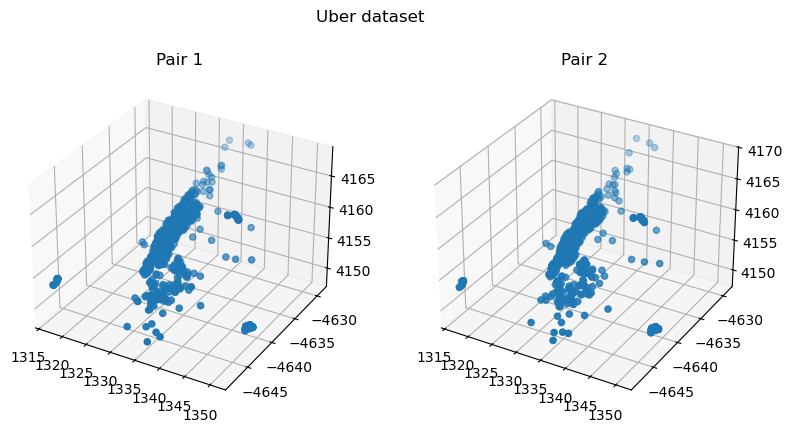

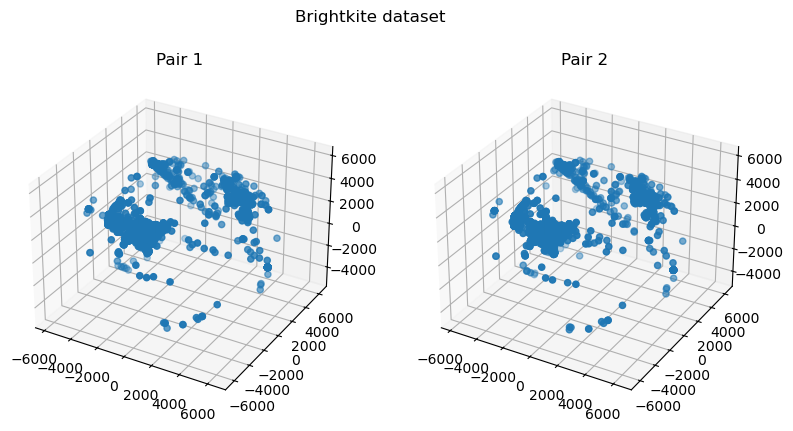

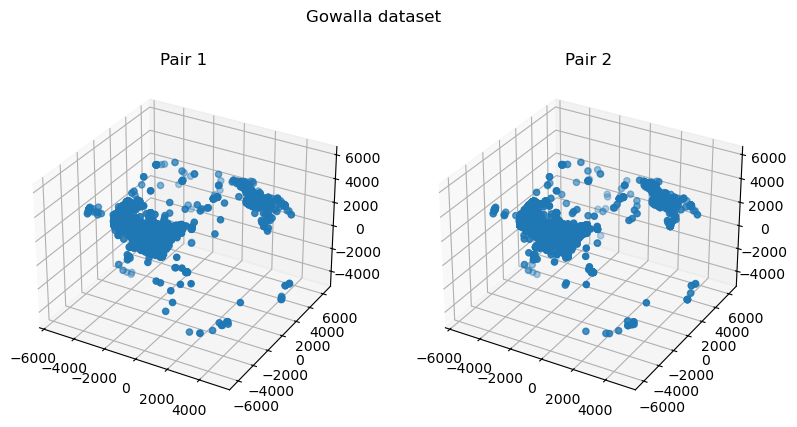

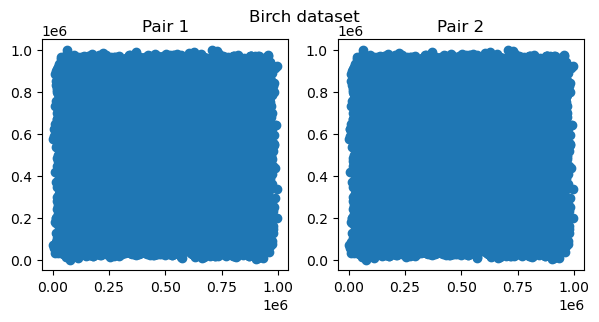

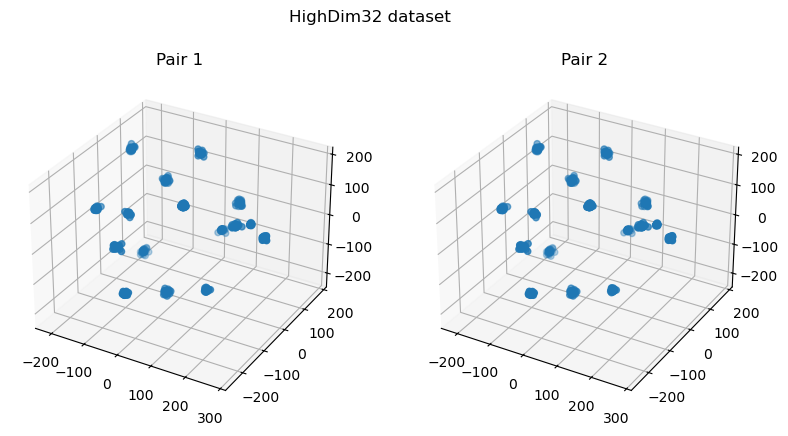

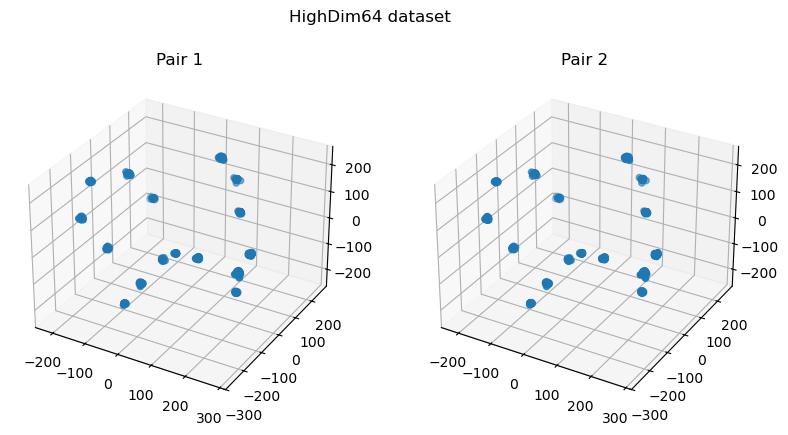

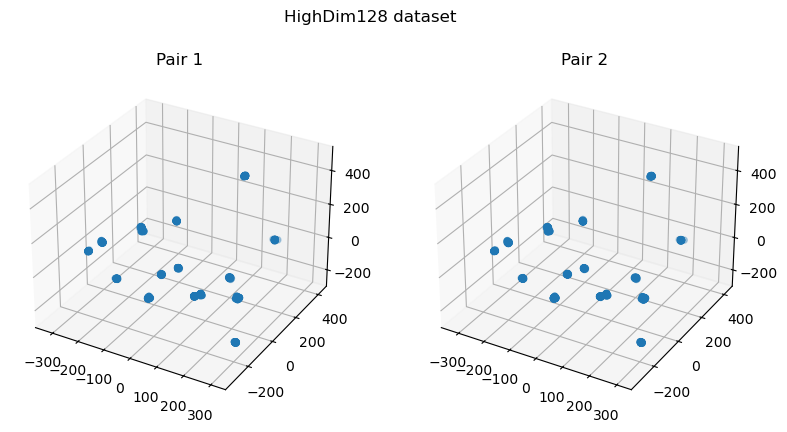

In [4]:
from src.testing.plot_helper import plot_data
from src.datasets import *
from os.path import join, isdir
from os import mkdir
ds_path = "./dataset"
dataset = [Uber(join(ds_path, "uber/uber_epsilon.csv"), lamb=1.1, k=10), 
           Geo(join(ds_path, "snap_standford/Brightkite_epsilon.csv"), "Brightkite", lamb=1.1, k=50),
           Geo(join(ds_path, "snap_standford/Gowalla_epsilon.csv"), "Gowalla", lamb=1.001, k=50),
           Birch(join(ds_path, "birch/birch1_epsilon.csv"), lamb=1.1, k=10),
           HighDim(join(ds_path, "high_dim/dim032_epsilon.csv"), dim=32, lamb=1.1, k=10),
           HighDim(join(ds_path, "high_dim/dim064_epsilon.csv"), dim=64, lamb=1.1, k=10),
           HighDim(join(ds_path, "high_dim/dim128_epsilon.csv"), dim=128, lamb=1.1, k=10)
           ]
plot_path = "./dataset/plot"
if not isdir(plot_path):
    mkdir(plot_path)
for ds in dataset:
    pair1, pair2 = ds.load()
    plot_data(pair1, pair2, plot_path, ds.name)

## Experiment

### k-resillient

In [6]:
import numpy as np
from src.resilient_k import resilient_k_center
from src.datasets import *
from os.path import join, isdir
from src.testing.plot_helper import plot_cluster_result
import pickle

Processing Uber dataset with k=10, lamb=1.1, alpha=0.5, beta=0.5, algorithm=gonz


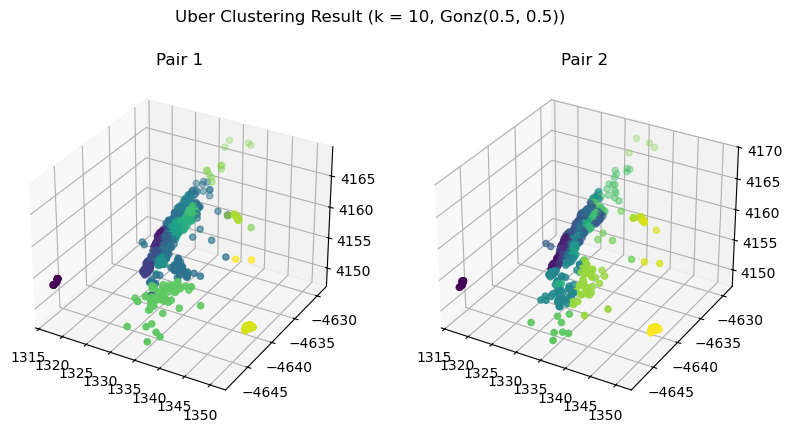

Processing Uber dataset with k=10, lamb=1.1, alpha=0.5, beta=1.0, algorithm=gonz


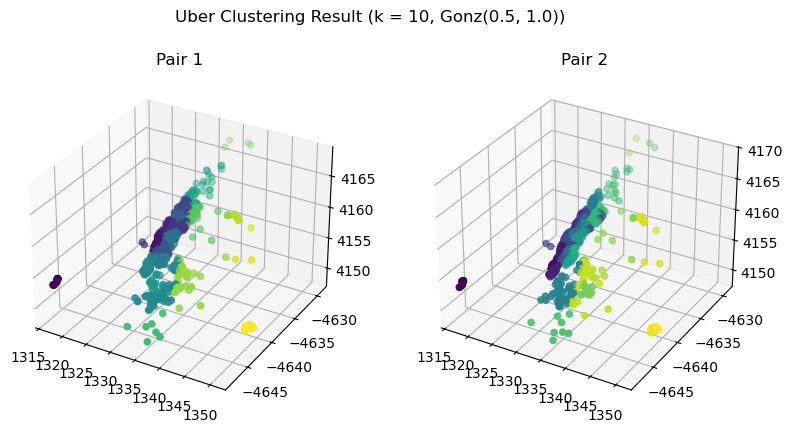

Processing Uber dataset with k=10, lamb=1.1, alpha=1.0, beta=0.5, algorithm=gonz


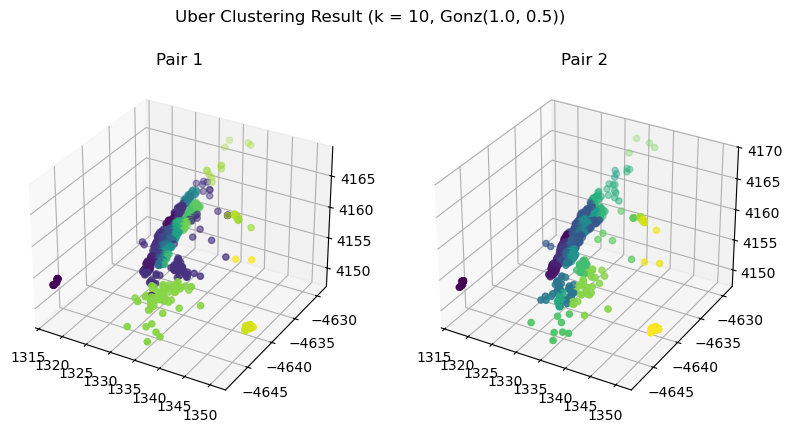

Processing Uber dataset with k=10, lamb=1.1, alpha=1.0, beta=1.0, algorithm=gonz


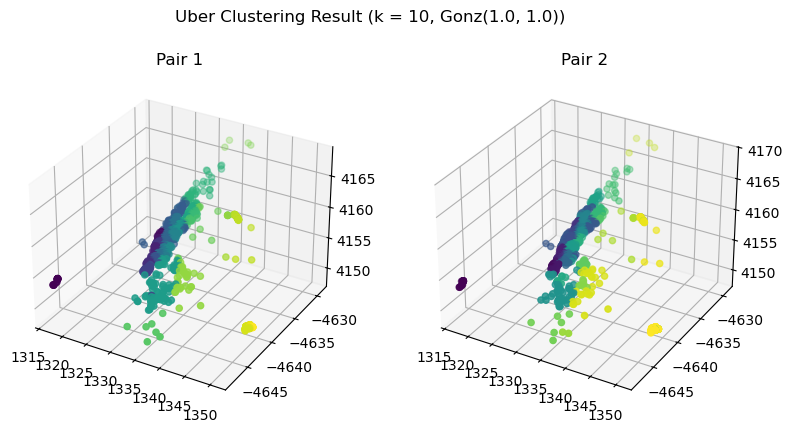

Processing Uber dataset with k=20, lamb=1.1, alpha=0.5, beta=0.5, algorithm=gonz


In [ ]:
# Gonz algorithm
ds_path = "./dataset"
resilient_k_param ={"alpha": [0.5, 1.0], 
                    "beta": [0.5, 1.0]}
dataset = [Uber(join(ds_path, "uber/uber_epsilon.csv"), lamb=1.1, k=10),
           Uber(join(ds_path, "uber/uber_epsilon.csv"), lamb=1.1, k=20),
           Geo(join(ds_path, "snap_standford/Brightkite_epsilon.csv"), "Brightkite", lamb=1.1, k=50), 
           Geo(join(ds_path, "snap_standford/Brightkite_epsilon.csv"), "Brightkite", lamb=1.1, k=100),
           Birch(join(ds_path, "birch/birch1_epsilon.csv"), lamb=1.1, k=10),
           Birch(join(ds_path, "birch/birch1_epsilon.csv"), lamb=1.1, k=20),
           HighDim(join(ds_path, "high_dim/dim032_epsilon.csv"), dim=32, lamb=1.1, k=10),
           HighDim(join(ds_path, "high_dim/dim032_epsilon.csv"), dim=32, lamb=1.1, k=20),
           HighDim(join(ds_path, "high_dim/dim064_epsilon.csv"), dim=64, lamb=1.1, k=10),
           HighDim(join(ds_path, "high_dim/dim064_epsilon.csv"), dim=64, lamb=1.1, k=20),
           HighDim(join(ds_path, "high_dim/dim128_epsilon.csv"), dim=128, lamb=1.1, k=10),
           HighDim(join(ds_path, "high_dim/dim128_epsilon.csv"), dim=128, lamb=1.1, k=20)
           ]
           #Geo(join(ds_path, "snap_standford/Gowalla_epsilon.csv"), "Gowalla", lamb=1.001, k=50),
           #Geo(join(ds_path, "snap_standford/Gowalla_epsilon.csv"), "Gowalla", lamb=1.001, k=100)]
plot_path = "./results/plot/resilient_k/gonz"
result_path = "./results/resilient_k/gonz"

for ds in dataset:
    for alpha in resilient_k_param["alpha"]:
        for beta in resilient_k_param["beta"]:     
            print(f"Processing {ds.name} dataset with k={ds.k}, lamb={ds.lamb}, alpha={alpha}, beta={beta}, algorithm=gonz")
            pair1, pair2 = ds.load()
            epsilon = 0.3
            model1 = resilient_k_center(pair1, k=ds.k, lamb=ds.lamb, epsilon=epsilon, alpha=alpha, beta=beta, algorithm="gonz")
            center1, cluster1 = model1.resilient_k_center()
            model2 = resilient_k_center(pair2, k=ds.k, lamb=ds.lamb, epsilon=epsilon)
            center2, cluster2 = model2.resilient_k_center()
            
            with open(join(result_path, f"{ds.name}_resilient_{ds.k}_gonz({alpha}_{beta}).pickle"), 'wb') as output_file:
                pickle.dump((center1, cluster1, center2, cluster2), output_file)
                
            pt1 = np.asarray([c[0] for c in cluster1])
            pt2 = np.asarray([c[0] for c in cluster2])
            label1 = [c[1] for c in cluster1]
            label2 = [c[1] for c in cluster2]
            plot_cluster_result(pt1, pt2, label1, label2, plot_path, ds, "gonz", alpha, beta)

Processing Uber dataset with k=10, lamb=1.1, alpha=0.5, beta=0.5, algorithm=carv
Best R:  12.0


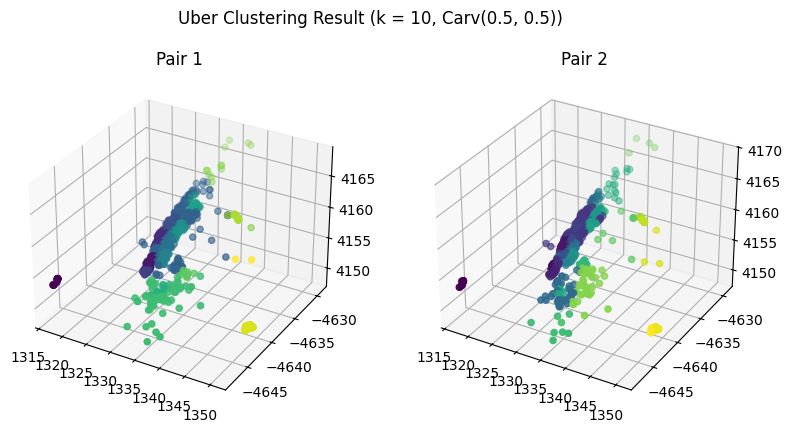

Processing Uber dataset with k=10, lamb=1.1, alpha=0.5, beta=1.0, algorithm=carv
Best R:  6.0


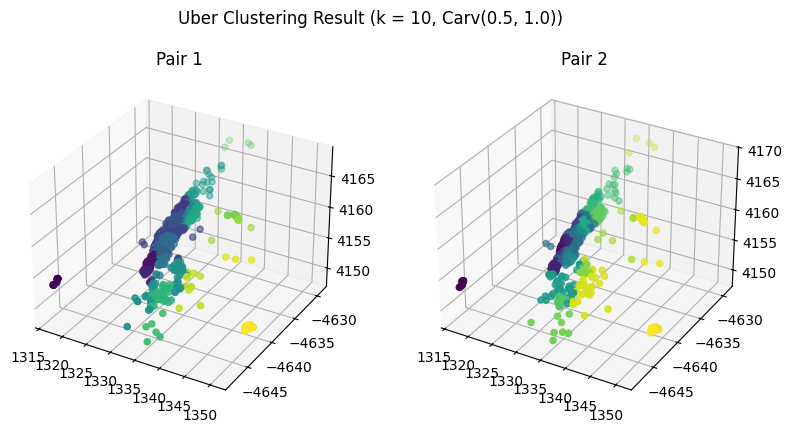

Processing Uber dataset with k=10, lamb=1.1, alpha=1.0, beta=0.5, algorithm=carv
Best R:  12.0


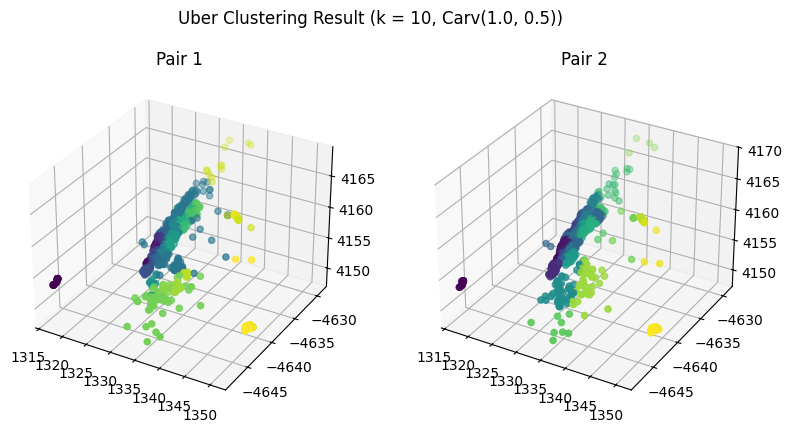

Processing Uber dataset with k=10, lamb=1.1, alpha=1.0, beta=1.0, algorithm=carv
Best R:  6.0


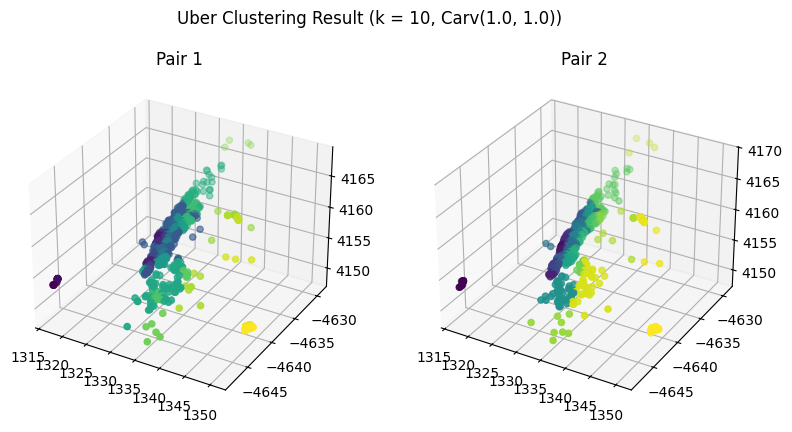

Processing Uber dataset with k=20, lamb=1.1, alpha=0.5, beta=0.5, algorithm=carv
Best R:  6.0


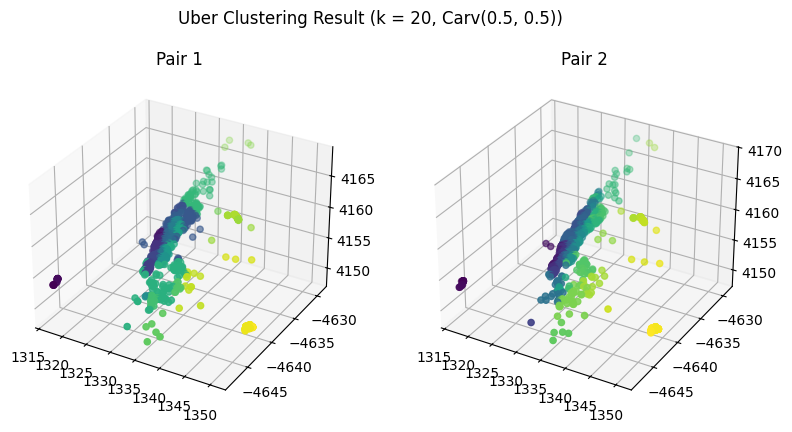

Processing Uber dataset with k=20, lamb=1.1, alpha=0.5, beta=1.0, algorithm=carv
Best R:  4.0


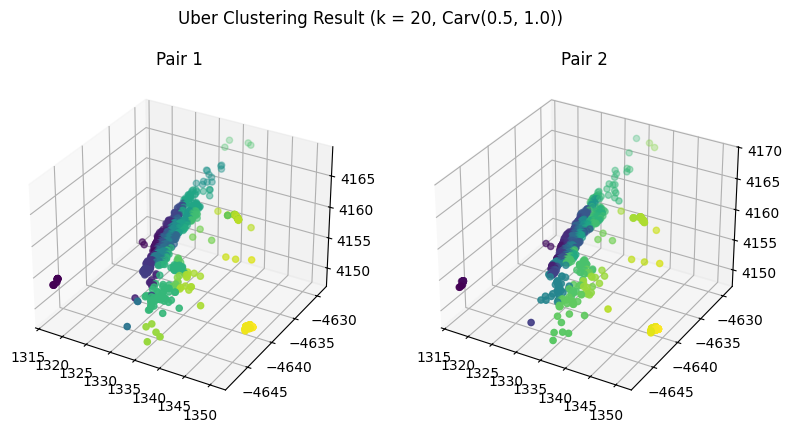

Processing Uber dataset with k=20, lamb=1.1, alpha=1.0, beta=0.5, algorithm=carv
Best R:  6.0


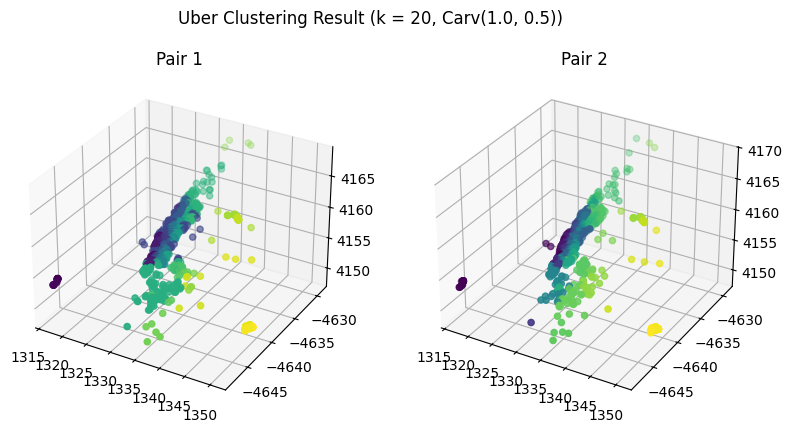

Processing Uber dataset with k=20, lamb=1.1, alpha=1.0, beta=1.0, algorithm=carv
Best R:  4.0


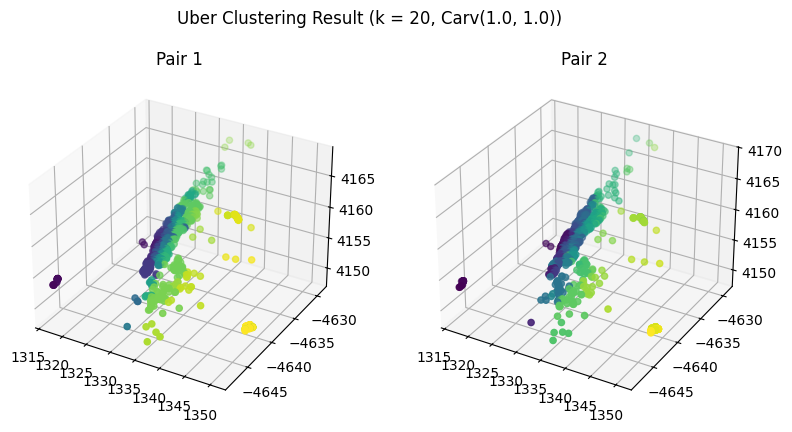

Processing Brightkite dataset with k=50, lamb=1.1, alpha=0.5, beta=0.5, algorithm=carv
Best R:  2822.0


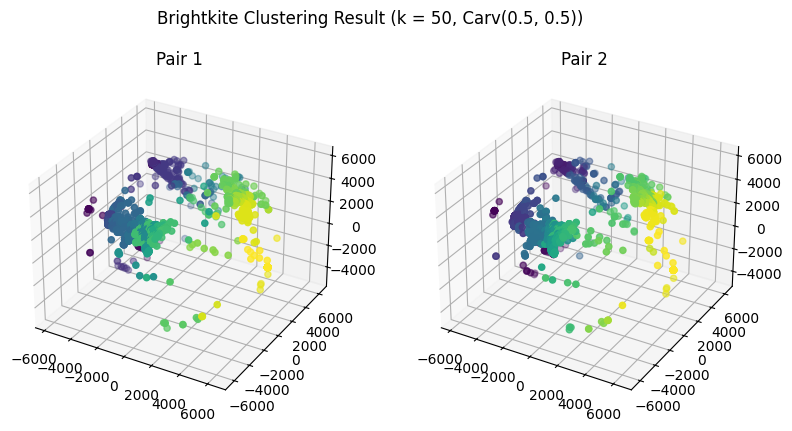

Processing Brightkite dataset with k=50, lamb=1.1, alpha=0.5, beta=1.0, algorithm=carv
Best R:  1767.0


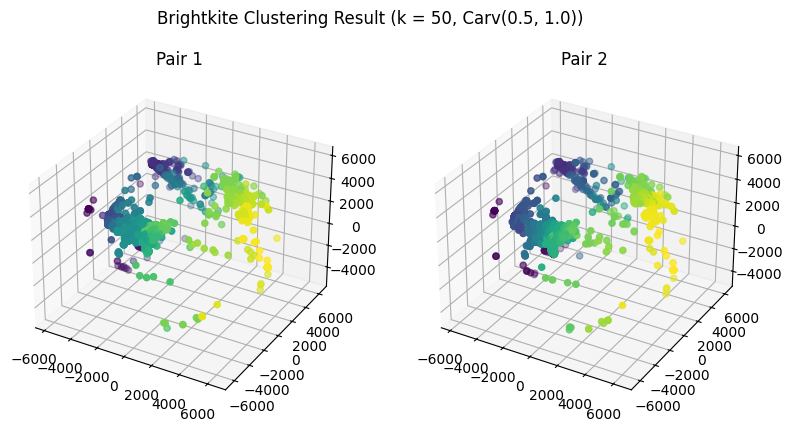

Processing Brightkite dataset with k=50, lamb=1.1, alpha=1.0, beta=0.5, algorithm=carv
Best R:  2822.0


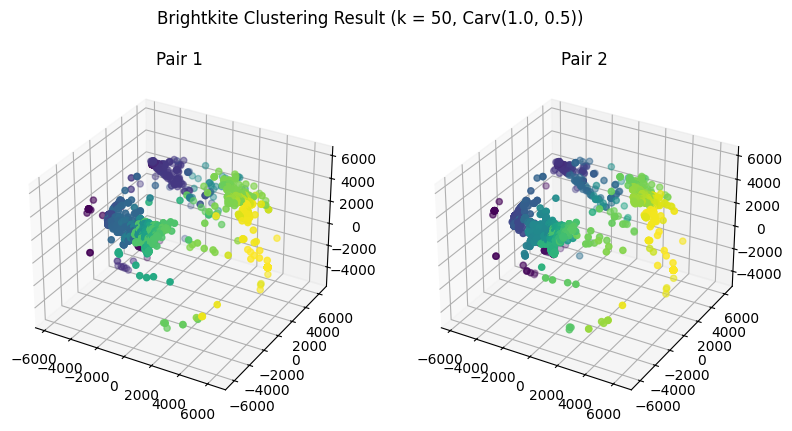

Processing Brightkite dataset with k=50, lamb=1.1, alpha=1.0, beta=1.0, algorithm=carv
Best R:  1767.0


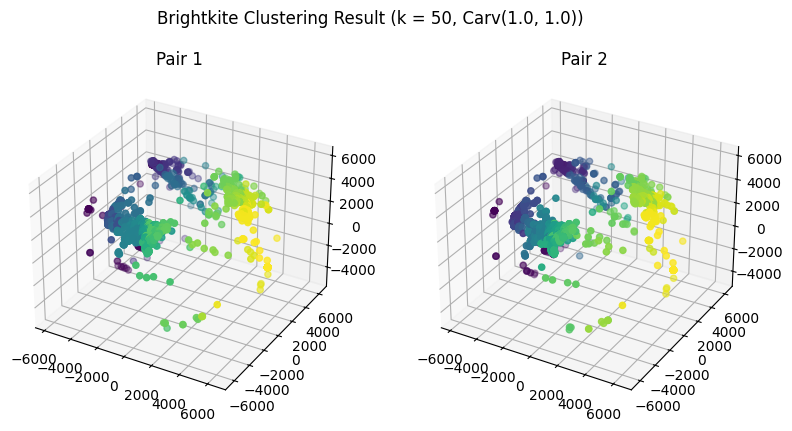

Processing Brightkite dataset with k=100, lamb=1.1, alpha=0.5, beta=0.5, algorithm=carv
Best R:  1767.0


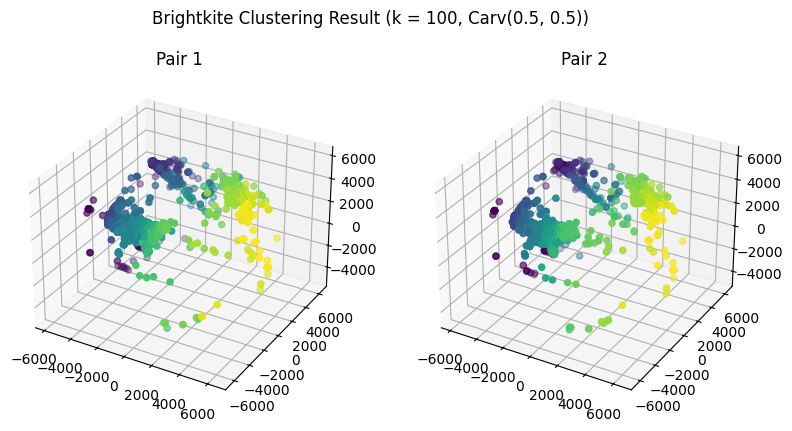

Processing Brightkite dataset with k=100, lamb=1.1, alpha=0.5, beta=1.0, algorithm=carv
Best R:  988.0


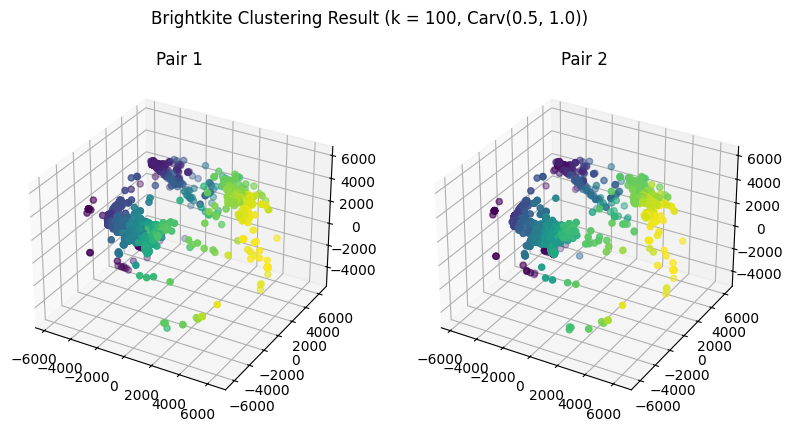

Processing Brightkite dataset with k=100, lamb=1.1, alpha=1.0, beta=0.5, algorithm=carv
Best R:  1767.0


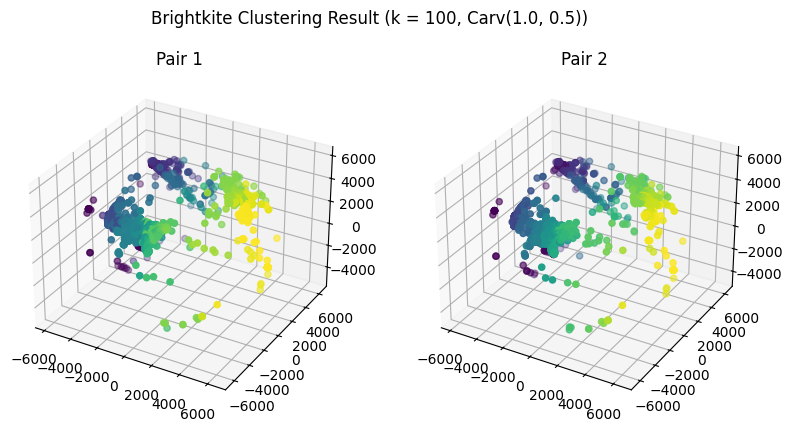

Processing Brightkite dataset with k=100, lamb=1.1, alpha=1.0, beta=1.0, algorithm=carv
Best R:  988.0


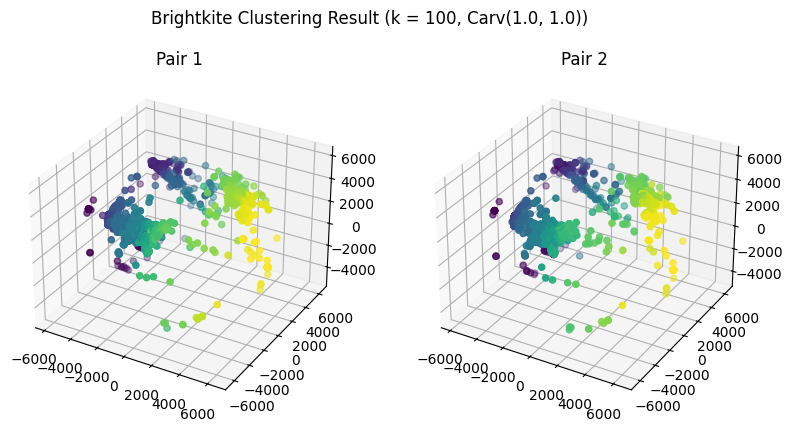

In [2]:
# Carv algorithm
ds_path = "./dataset"
resilient_k_param ={"alpha": [0.5, 1.0], 
                    "beta": [0.5, 1.0]}
dataset = [Uber(join(ds_path, "uber/uber_epsilon.csv"), lamb=1.1, k=10),
           Uber(join(ds_path, "uber/uber_epsilon.csv"), lamb=1.1, k=20),
           Geo(join(ds_path, "snap_standford/Brightkite_epsilon.csv"), "Brightkite", lamb=1.1, k=50), 
           Geo(join(ds_path, "snap_standford/Brightkite_epsilon.csv"), "Brightkite", lamb=1.1, k=100),
           Birch(join(ds_path, "birch/birch1_epsilon.csv"), lamb=1.1, k=10),
           Birch(join(ds_path, "birch/birch1_epsilon.csv"), lamb=1.1, k=20),
           HighDim(join(ds_path, "high_dim/dim032_epsilon.csv"), dim=32, lamb=1.1, k=10),
           HighDim(join(ds_path, "high_dim/dim032_epsilon.csv"), dim=32, lamb=1.1, k=20),
           HighDim(join(ds_path, "high_dim/dim064_epsilon.csv"), dim=64, lamb=1.1, k=10),
           HighDim(join(ds_path, "high_dim/dim064_epsilon.csv"), dim=64, lamb=1.1, k=20),
           HighDim(join(ds_path, "high_dim/dim128_epsilon.csv"), dim=128, lamb=1.1, k=10),
           HighDim(join(ds_path, "high_dim/dim128_epsilon.csv"), dim=128, lamb=1.1, k=20)
           ]#,
           #Geo(join(ds_path, "snap_standford/Gowalla_epsilon.csv"), "Gowalla", lamb=1.001, k=50),
           #Geo(join(ds_path, "snap_standford/Gowalla_epsilon.csv"), "Gowalla", lamb=1.001, k=100)]
plot_path = "./results/plot/resilient_k/carv"
result_path = "./results/resilient_k/carv"

for ds in dataset:
    for alpha in resilient_k_param["alpha"]:
        for beta in resilient_k_param["beta"]:     
            print(f"Processing {ds.name} dataset with k={ds.k}, lamb={ds.lamb}, alpha={alpha}, beta={beta}, algorithm=carv")
            pair1, pair2 = ds.load()
            epsilon = 0.3
            model1 = resilient_k_center(pair1, k=ds.k, lamb=ds.lamb, epsilon=epsilon, alpha=alpha, beta=beta, algorithm="carv")
            center1, cluster1 = model1.resilient_k_center()
            model2 = resilient_k_center(pair2, k=ds.k, lamb=ds.lamb, epsilon=epsilon)
            center2, cluster2 = model2.resilient_k_center()
            
            with open(join(result_path, f"{ds.name}_resilient_{ds.k}carv({alpha}_{beta}).pickle"), 'wb') as output_file:
                pickle.dump((center1, cluster1, center2, cluster2), output_file)
                
            pt1 = np.asarray([c[0] for c in cluster1])
            pt2 = np.asarray([c[0] for c in cluster2])
            label1 = [c[1] for c in cluster1]
            label2 = [c[1] for c in cluster2]
            plot_cluster_result(pt1, pt2, label1, label2, plot_path, ds, "carv", alpha, beta)

## Evalutaion

In [8]:
from src.evaluation import Metrics, Clustering
from src.testing.find_pair_assignment import find_pair_assign
from os.path import join, isdir
from os import mkdir
from src.datasets import *
import pickle

### Baseline

In [9]:
# Gonz algorithm only
from src.evaluation import GonzalezAlgorithm

ds_path = "./dataset"
resilient_k_param ={"alpha": [0.5, 1.0], 
                    "beta": [0.5, 1.0], 
                    "algorithm": ["gonz", "carv"]
                    }
to_eval = [Uber(join(ds_path, "uber/uber_epsilon.csv"), lamb=1.1, k=10),
           Uber(join(ds_path, "uber/uber_epsilon.csv"), lamb=1.1, k=20),
           Geo(join(ds_path, "snap_standford/Brightkite_epsilon.csv"), "Brightkite", lamb=1.1, k=50), 
           Geo(join(ds_path, "snap_standford/Brightkite_epsilon.csv"), "Brightkite", lamb=1.1, k=100),
           Geo(join(ds_path, "snap_standford/Gowalla_epsilon.csv"), "Gowalla", lamb=1.001, k=50),
           Geo(join(ds_path, "snap_standford/Gowalla_epsilon.csv"), "Gowalla", lamb=1.001, k=100)]
plot_path = "./results/plot"
result_path = "./results"

for ds in to_eval:
    print(f"Processing {ds.name} dataset with k={ds.k}, algorithm=gonz_only")
    pair1, pair2 = ds.load()
    model1 = GonzalezAlgorithm(pair1, ds.k)
    center1, cluster1 = model1.gonzalez()
    model1 = GonzalezAlgorithm(pair2, ds.k)
    center2, cluster2 = model1.gonzalez()
    
    with open(join(result_path, f"{ds.name}_resilient_{ds.k}_gonz_only.pickle"), 'wb') as output_file:
        pickle.dump((center1, cluster1, center2, cluster2), output_file)

Processing Uber dataset with k=10, algorithm=gonz_only
Processing Uber dataset with k=20, algorithm=gonz_only
Processing Brightkite dataset with k=50, algorithm=gonz_only
Processing Brightkite dataset with k=100, algorithm=gonz_only
Processing Gowalla dataset with k=50, algorithm=gonz_only
Processing Gowalla dataset with k=100, algorithm=gonz_only


In [ ]:
# Carve algorithm only
from src.evaluation import CarvingAlgorithm
ds_path = "./dataset"
resilient_k_param ={"alpha": [0.5, 1.0], 
                    "beta": [0.5, 1.0], 
                    "algorithm": ["gonz", "carv"]
                    }
to_eval = [Uber(join(ds_path, "uber/uber_epsilon.csv"), lamb=1.1, k=10),
           Uber(join(ds_path, "uber/uber_epsilon.csv"), lamb=1.1, k=20),
           Geo(join(ds_path, "snap_standford/Brightkite_epsilon.csv"), "Brightkite", lamb=1.1, k=50), 
           Geo(join(ds_path, "snap_standford/Brightkite_epsilon.csv"), "Brightkite", lamb=1.1, k=100),
           Geo(join(ds_path, "snap_standford/Gowalla_epsilon.csv"), "Gowalla", lamb=1.001, k=50),
           Geo(join(ds_path, "snap_standford/Gowalla_epsilon.csv"), "Gowalla", lamb=1.001, k=100)]
plot_path = "./results/plot"
result_path = "./results"

for ds in to_eval:
    print(f"Processing {ds.name} dataset with k={ds.k}, algorithm=gonz_only")
    pair1, pair2 = ds.load()
    
    model1 = CarvingAlgorithm(pair1)
    best_r = model1.find_minimum_R(ds.k)
    center1, cluster1 = model1.carve(best_r, ds.k)
    model2 = CarvingAlgorithm(pair2)
    best_r = model2.find_minimum_R(ds.k)
    center2, cluster2 = model2.carve(best_r, ds.k)
    with open(join(result_path, f"{ds.name}_resilient_{ds.k}_carve_only.pickle"), 'wb') as output_file:
        pickle.dump((center1, cluster1, center2, cluster2), output_file)

In [ ]:
# HS algorithm only
from src.evaluation import HSAlgorithm
ds_path = "./dataset"
resilient_k_param ={"alpha": [0.5, 1.0], 
                    "beta": [0.5, 1.0], 
                    "algorithm": ["gonz", "carv"]
                    }
to_eval = [Uber(join(ds_path, "uber/uber_epsilon.csv"), lamb=1.1, k=10),
           Uber(join(ds_path, "uber/uber_epsilon.csv"), lamb=1.1, k=20),
           Geo(join(ds_path, "snap_standford/Brightkite_epsilon.csv"), "Brightkite", lamb=1.1, k=50), 
           Geo(join(ds_path, "snap_standford/Brightkite_epsilon.csv"), "Brightkite", lamb=1.1, k=100),
           Geo(join(ds_path, "snap_standford/Gowalla_epsilon.csv"), "Gowalla", lamb=1.001, k=50),
           Geo(join(ds_path, "snap_standford/Gowalla_epsilon.csv"), "Gowalla", lamb=1.001, k=100)]
plot_path = "./results/plot"
result_path = "./results"

for ds in to_eval:
    print(f"Processing {ds.name} dataset with k={ds.k}, algorithm=gonz_only")
    pair1, pair2 = ds.load()
    
    model1 = HSAlgorithm(pair1,ds.k)
    center1, cluster1 = model1.hs_algorithm(pair1, ds.k)
    model2 = HSAlgorithm(pair1,ds.k)
    center2, cluster2 = model2.hs_algorithm(pair2, ds.k)
    with open(join(result_path, f"{ds.name}_resilient_{ds.k}_hs_only.pickle"), 'wb') as output_file:
        pickle.dump((center1, cluster1, center2, cluster2), output_file)

In [ ]:
# Visualization
